<h4 align='center'><b>Однофакторная линейная регрессия</b></h4>

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as spo
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
%matplotlib inline

In [3]:
data = pd.DataFrame({
    'X': [11.6, 17.1, 32.2, 18.1, 18.9, 35.9, 37.8, 14.5,
         16.1, 31.1, 32.4, 14.0, 17.4, 34.5, 13.4],
    'Y': [2.7, 2.4, 2.3, 2.3, 2.5, 2.5, 2.4, 2.6, 
         2.7, 2.6, 2.2, 2.7, 2.6, 2.3, 2.6]
})
test_x = 38.3

In [4]:
data

,X,Y
0,11.6,2.7
1,17.1,2.4
2,32.2,2.3
3,18.1,2.3
4,18.9,2.5
5,35.9,2.5
6,37.8,2.4
7,14.5,2.6
8,16.1,2.7
9,31.1,2.6


<AxesSubplot:xlabel='Вантажообіг', ylabel='Витрат обігу автомашин'>

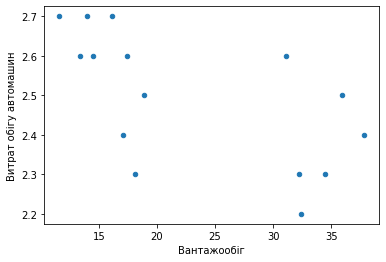

In [5]:
#fig, axs = plt.subplots(figsize=(12, 10))
data.plot(x='X', y='Y', kind='scatter', 
          xlabel='Вантажообіг', ylabel='Витрат обігу автомашин',
)

In [6]:
x = np.array(data['X']).reshape(-1, 1)
y = np.array(data['Y'])
model = LinearRegression().fit(x, y)

In [7]:
r_sq = model.score(x, y)
print('R-squared', r_sq)

R-squared 0.3852542039037068


In [8]:
b0 = model.intercept_
b1 = model.coef_[0]
print('Intercept:', b0)
print('Slope:', b1)

Intercept: 2.7417007183505926
Slope: -0.010798581957272143


In [9]:
y_pred = model.predict(np.array(test_x).reshape(-1, 1))[0]
print('Predicted response:', y_pred)

Predicted response: 2.3281150293870696


In [10]:
# Test Fishera
t = f_regression(x, y)
print('F-statistic:', t[0][0])

F-statistic: 8.14695225660984


In [11]:
cov = np.cov(x.reshape(1,-1), y)
cov

array([[ 9.18771429e+01, -9.92142857e-01],
       [-9.92142857e-01,  2.78095238e-02]])

In [12]:
b0_err, b1_err = np.sqrt(np.diag(cov))
b0_conf = sps.t.interval(0.05, df=len(x.reshape(1, -1)),
                        loc=b0, scale=b0_err)
b1_conf = sps.t.interval(0.05, df=len(x.reshape(1, -1)),
                        loc=b1, scale=b1_err)

In [13]:
print(f"a = {b0:0.4f} ± {b0_err:0.4f}, доверительный интервал α=5% [{b0_conf[0]:0.4f} - {b0_conf[1]:0.4f}]")
print(f"b = {b1:0.4f} ± {b1_err:0.4f}, доверительный интервал α=5% [{b1_conf[0]:0.4f} - {b1_conf[1]:0.4f}]")

a = 2.7417 ± 9.5853, доверительный интервал α=5% [1.9873 - 3.4961]
b = -0.0108 ± 0.1668, доверительный интервал α=5% [-0.0239 - 0.0023]


Text(0, 0.5, 'переменная y')

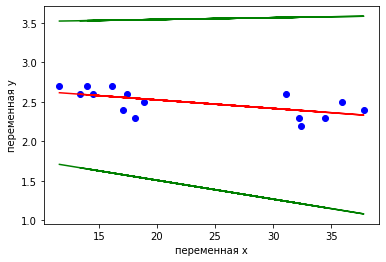

In [17]:
def mk_model(b0, b1):
    return lambda x: b1 * x + b0 

x = data['X']
y = data['Y']
plt.scatter(x, y, color='blue')
plt.plot(x, mk_model(b0, b1)(x), color='red')
plt.plot(x, mk_model(b0_conf[0], b1_conf[0])(x), color='green')
plt.plot(x, mk_model(b0_conf[1], b1_conf[1])(x), color='green')
plt.xlabel('переменная х')
plt.ylabel('переменная y')